In [237]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('mouses_limpo.xlsx')

In [238]:
display(df)

,nome,preco_total,parcelas,valor,cor_principal
0,"mouse gamer redragon cobra, chroma rgb, 10000d...",109.99,5,25.88,preto
1,"mouse gamer redragon predator, chroma rgb, 800...",99.99,4,29.41,preto
2,"mouse gamer sem fio redragon storm pro, rgb, 1...",189.99,8,27.94,preto
3,"mouse gamer redragon cobra, chroma rgb, 10000d...",105.99,4,31.17,branco
4,"mouse gamer logitech g203 lightsync rgb, efeit...",119.99,5,28.23,preto
...,...,...,...,...,...
933,mouse nacon wired gaming mouse gm-105red - opt...,196.18,9,25.64,vermelho
934,"mouse gamer havit ms1008, rgb, 3200 dpi, 7 botões",68.40,2,36.00,não identificada
935,mouse gamer c3tech 2400dpi c/ iluminação preto...,41.29,1,41.29,preto
936,mouse usb gamer zyron 12800 dpi rgb black pmgz...,112.41,4,31.22,preto


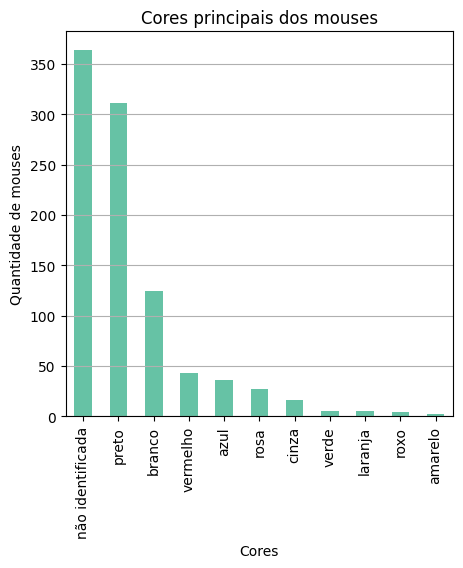

In [239]:
# Cores dos mouses

cor_mouse = df['cor_principal'].value_counts()

cor_mouse.plot(kind='bar', figsize=(5,5), colormap='Set2')
plt.title('Cores principais dos mouses')
plt.xlabel('Cores')
plt.ylabel('Quantidade de mouses')
plt.grid(axis='y')
plt.show()


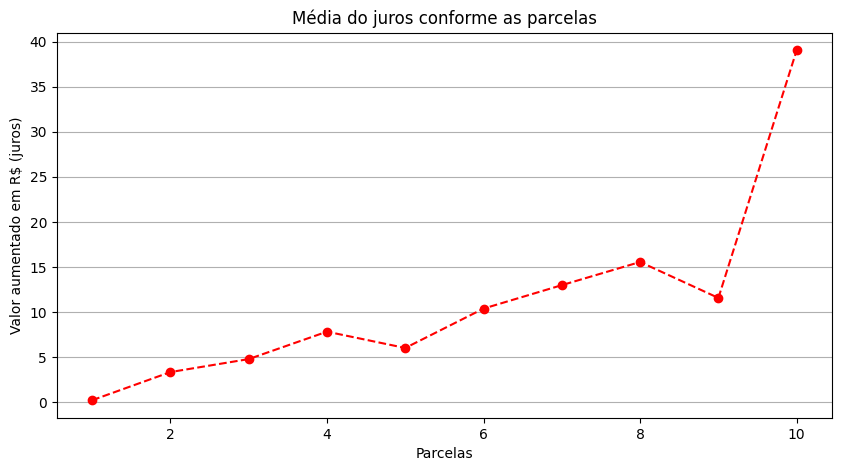

In [240]:
# A média do valor a mais pago(juros) por número de parcelas

total_parcelado = df['parcelas'] * df['valor']
df['juros'] = total_parcelado - df['preco_total']

media_juros_por_parcela = df.groupby('parcelas')['juros'].mean()

media_juros_por_parcela.plot(marker='o', linestyle='--', figsize=(10,5), color='red')
plt.title("Média do juros conforme as parcelas")
plt.xlabel('Parcelas')
plt.ylabel('Valor aumentado em R$ (juros)')
plt.grid(axis='y')
plt.show()

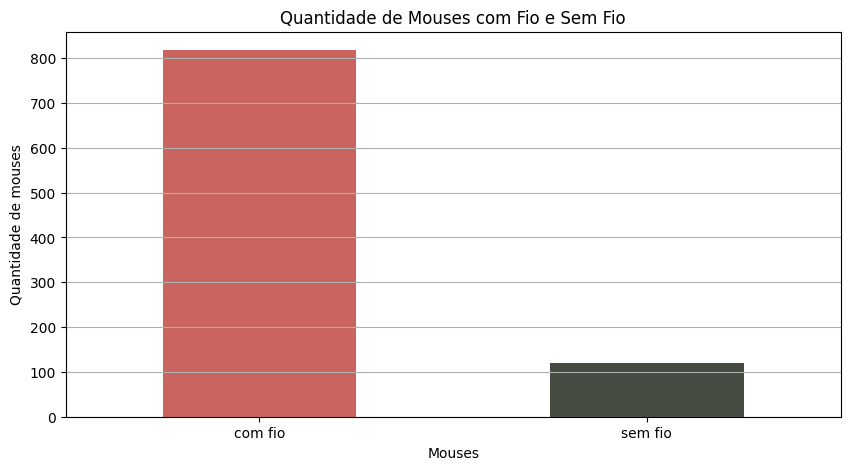

In [241]:
# quantidade de mouses que operam com ou sem fio

df['sem_fio'] = df['nome'].str.contains('sem fio', case=False, na=False)
df['sem_fio'] = df['sem_fio'].replace({True: 'sem fio', False: 'com fio'})

contagem_mouses = df['sem_fio'].value_counts()

contagem_mouses.plot(kind='bar',  color=['#CA645E', '#454B40'],figsize=(10,5))
plt.title('Quantidade de Mouses com Fio e Sem Fio')
plt.xlabel('Mouses')
plt.ylabel('Quantidade de mouses')
plt.grid(axis= 'y')
plt.xticks(rotation=0)
plt.show()

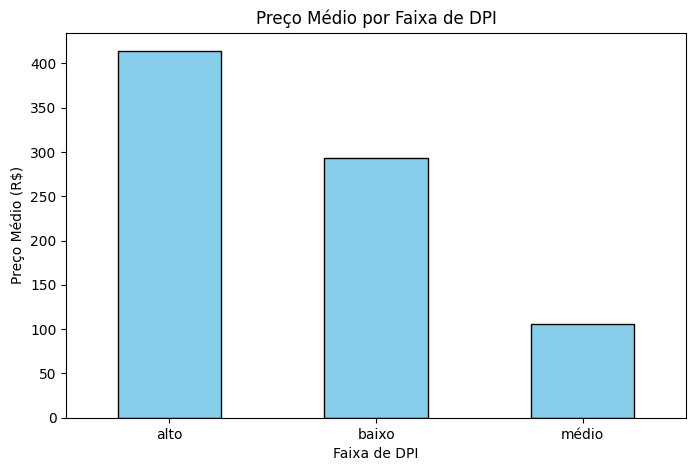

In [242]:
# a media de preço pelo o dpi
df['dpi'] = df['nome'].str.extract(r'(\d+)\s?(DPI|dpi|DPI:|dpi:)', expand=False)[0].astype(float)

def classificar_dpi(x):
    if x < 1600:
        return 'baixo'
    elif 1600 <= x <= 4000:
        return 'médio'
    else:
        return 'alto'

df['categoria_dpi'] = df['dpi'].apply(classificar_dpi)

media_preco_por_dpi = df.groupby('categoria_dpi')['preco_total'].mean()


media_preco_por_dpi.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(8, 5))
plt.title('Preço Médio por Faixa de DPI')
plt.xlabel('Faixa de DPI')
plt.ylabel('Preço Médio (R$)')
plt.xticks(rotation=0)
plt.show()

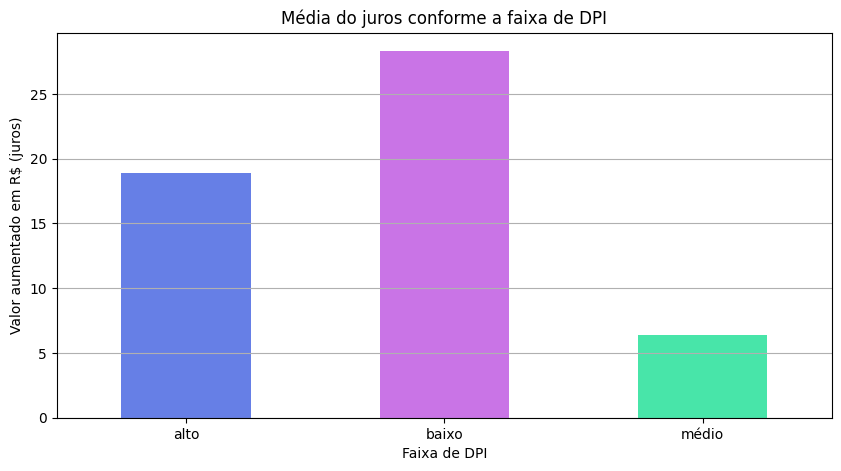

In [243]:
#Média do juros conforme a faixa de DPI
media_juros_por_parcela = df.groupby('categoria_dpi')['juros'].mean()

media_juros_por_parcela.plot(kind='bar', figsize=(10,5), color=['#667FE6', '#C974E6', '#48E5A9'])
plt.title("Média do juros conforme a faixa de DPI")
plt.xlabel('Faixa de DPI')
plt.ylabel('Valor aumentado em R$ (juros)')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()

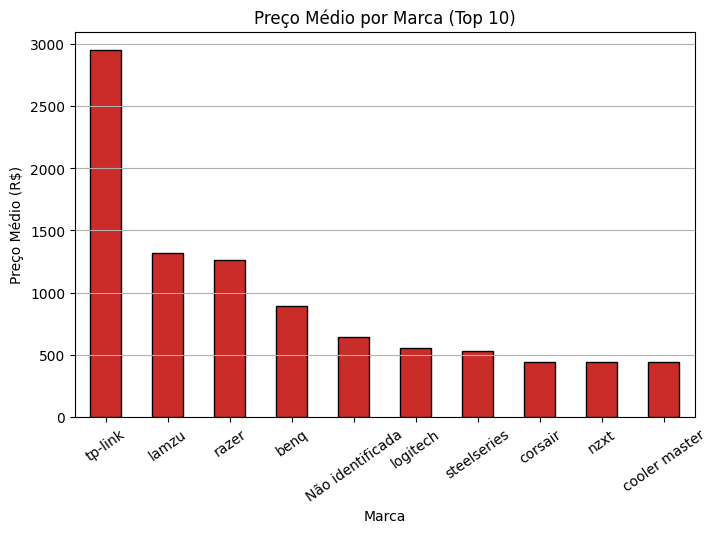

In [244]:
#media de preço por Marca (Top 10)

marcas = [
    "5+","Acer","Adata","Aitek","Akko","Aoas","Aoc","ARGOM","ASUS","AULA","B-Max","Benq","Biostar","Blue Waves Informatica","Bluecase",
    "BR One","Brazil PC","BRAZILPC","Bright","C3 Tech Tech","C3 Tech-tech","C3 Techtech","C3Tech","C3Techtech","Checkpoint","Clanm","Concordia",
    "Cooler Master","Corsair","Cougar","Dazz","Deepcool","Delta","Draxen","Ebai","Edifier","Elg","ESTONE","Evolut","Evus","Exbom","FANTECH","Force One",
    "Forceone","Fortrek","FY","Galax","Gamdias","GAMESIR","Generico","Genius","Geonav","GOLDENTEC ACESSORIOS","Greatek","H'MASTON","H'Mastonn","Haiz",
    "Havit","Hayom","Hoopson","Hp","HREBOS","Husky","Hyper X","Hyperx","Imice","Infokit","Inova","K-mex","KAPBOM","Kmex","Knup","Kross Elegance","Ktrok",
    "KWG","Lehmox","Lelong","Lenovo","Logitech","Logitech G","Machenike","Marvo","Maxprint","Maxprint/dazz","MbTech","Microdigi","Microsoft","Motospeed",
    "Mox","MSI","Multi","Mymax","não informado","Nave","Nemesis","NEOLOGIC","Newlink","NZXT","Oex","Oex Game","Outros","Patriot","PCYES","PDN","Peining",
    "Philco","Philips","Ponto Do Nerd","Rapoo","Razer","Redragon","Rise Mode","SADES","SHINKA","Steelseries","T-DAGGER","Tectoy","Thermaltake","Tomate",
    "TP-Link","Trust","Trust Gaming","Verde","Vinik","Viper Pro Gamer","Warrior","Xiaomi","XT Racer","Xtrike","XTRIKE ME","XTRIKE-ME","Yunni","Zowie",
    'thunderobot', 'icarus', 'k-snake', 'lamzu', 'aplus tech', 'viper'
]
marcas_lower = [x.lower() for x in marcas]
def achar_marca(texto):
    for x in marcas_lower:
        if x in texto:
            return x
    return 'Não identificada'

df['marca'] = df['nome'].apply(achar_marca)

media_preco_por_marca = df.groupby('marca')['preco_total'].mean()

top_marcas = media_preco_por_marca.nlargest(10)

# Plotar apenas essas marcas
top_marcas.plot(kind='bar', color='#CA2C2A', edgecolor='black', figsize=(8, 5))
plt.title('Preço Médio por Marca (Top 10)')
plt.xlabel('Marca')
plt.ylabel('Preço Médio (R$)')
plt.xticks(rotation=35)
plt.grid(axis='y')
plt.show()

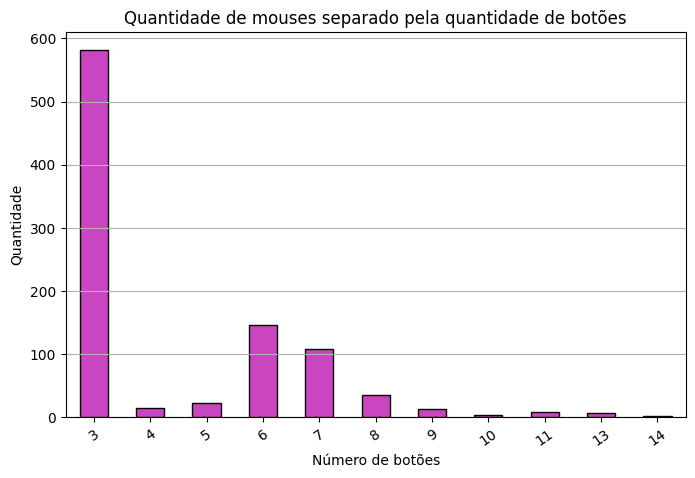

In [245]:
#Quantidade de mouses separado pela quantidade de botões
df['botoes'] = df['nome'].str.extract(r'(\d+)\s+botões').astype(float)
df['botoes'] = df['botoes'].fillna(3).astype(int)


media_preco_por_marca = df.groupby('botoes')['nome'].count()

media_preco_por_marca.plot(kind='bar', color='#CA46C1', edgecolor='black', figsize=(8, 5))
plt.title('Quantidade de mouses separado pela quantidade de botões')
plt.xlabel('Número de botões')
plt.ylabel('Quantidade')
plt.xticks(rotation=35)
plt.grid(axis='y')
plt.show()

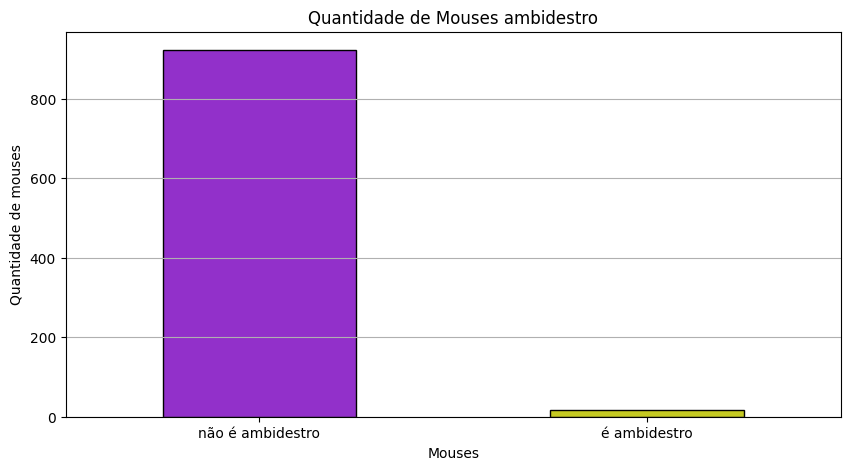

In [246]:

df['ambidestro'] = df['nome'].str.contains('ambidestro', case=False, na=False)
df['ambidestro'] = df['ambidestro'].replace({True: 'é ambidestro', False: 'não é ambidestro'})

contagem_mouses_ambidestro = df['ambidestro'].value_counts()

contagem_mouses_ambidestro.plot(kind='bar',  color=['#9230CA', '#C5CA22'],figsize=(10,5), edgecolor='black')
plt.title('Quantidade de Mouses ambidestro')
plt.xlabel('Mouses')
plt.ylabel('Quantidade de mouses')
plt.grid(axis= 'y')
plt.xticks(rotation=0)
plt.show()

In [247]:
display(df.info())
display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nome           938 non-null    object 
 1   preco_total    938 non-null    float64
 2   parcelas       938 non-null    int64  
 3   valor          938 non-null    float64
 4   cor_principal  938 non-null    object 
 5   juros          938 non-null    float64
 6   sem_fio        938 non-null    object 
 7   dpi            634 non-null    float64
 8   categoria_dpi  938 non-null    object 
 9   marca          938 non-null    object 
 10  botoes         938 non-null    int64  
 11  ambidestro     938 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 88.1+ KB


None

,nome,preco_total,parcelas,valor,cor_principal,juros,sem_fio,dpi,categoria_dpi,marca,botoes,ambidestro
0,"mouse gamer redragon cobra, chroma rgb, 10000d...",109.99,5,25.88,preto,19.41,com fio,10000.0,alto,redragon,7,não é ambidestro
1,"mouse gamer redragon predator, chroma rgb, 800...",99.99,4,29.41,preto,17.65,com fio,8000.0,alto,redragon,9,não é ambidestro
2,"mouse gamer sem fio redragon storm pro, rgb, 1...",189.99,8,27.94,preto,33.53,sem fio,16000.0,alto,redragon,8,não é ambidestro
3,"mouse gamer redragon cobra, chroma rgb, 10000d...",105.99,4,31.17,branco,18.69,com fio,10000.0,alto,redragon,7,não é ambidestro
4,"mouse gamer logitech g203 lightsync rgb, efeit...",119.99,5,28.23,preto,21.16,com fio,0.0,baixo,logitech,6,não é ambidestro
...,...,...,...,...,...,...,...,...,...,...,...,...
933,mouse nacon wired gaming mouse gm-105red - opt...,196.18,9,25.64,vermelho,34.58,com fio,2400.0,médio,Não identificada,3,não é ambidestro
934,"mouse gamer havit ms1008, rgb, 3200 dpi, 7 botões",68.40,2,36.00,não identificada,3.60,com fio,3200.0,médio,havit,7,não é ambidestro
935,mouse gamer c3tech 2400dpi c/ iluminação preto...,41.29,1,41.29,preto,0.00,com fio,2400.0,médio,c3tech,3,não é ambidestro
936,mouse usb gamer zyron 12800 dpi rgb black pmgz...,112.41,4,31.22,preto,12.47,com fio,12800.0,alto,pcyes,3,não é ambidestro
